In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
from keras import regularizers

In [2]:
print(tf.__version__)

2.11.0


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Dataset",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 17509 files belonging to 9 classes.


In [4]:
class_names=dataset.class_names
class_names

['Chinee apple',
 'Lantana',
 'Negative',
 'Parkinsonia',
 'Parthenium',
 'Prickly acacia',
 'Rubber vine',
 'Siam weed',
 'Snake weed']

In [5]:
len(dataset)

548

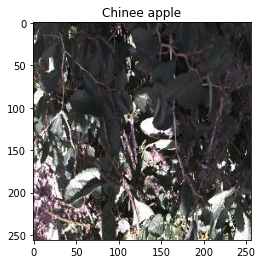

In [6]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    

In [8]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [9]:
len(train_ds)
len(val_ds)
len(test_ds)

56

In [10]:
len(train_ds)

438

In [11]:
len(val_ds)

54

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
len(train_ds)

438

In [14]:
len(test_ds)

56

In [15]:
len(val_ds)

54

In [16]:
resizing_and_rescaleing = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.4),
    
])

In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=9
model = models.Sequential([
    resizing_and_rescaleing,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape,kernel_regularizer=regularizers.l1(0.07)),
    layers.MaxPooling2D((2,2)),
    
    
    
    
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    ])
model.build( input_shape=input_shape)

In [19]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [21]:
history = model.fit(
     train_ds,
     epochs=EPOCHS,
     batch_size=BATCH_SIZE,
     verbose=1,
     validation_data=val_ds
)

Epoch 1/50
438/438 [==============================] - 541s 1s/step - loss: 1.6193 - accuracy: 0.5222 - val_loss: 1.4545 - val_accuracy: 0.5278
Epoch 2/50
438/438 [==============================] - 453s 1s/step - loss: 1.3541 - accuracy: 0.5399 - val_loss: 1.3878 - val_accuracy: 0.5417
Epoch 3/50
438/438 [==============================] - 429s 975ms/step - loss: 1.2352 - accuracy: 0.5671 - val_loss: 1.1985 - val_accuracy: 0.5619
Epoch 4/50
438/438 [==============================] - 434s 985ms/step - loss: 1.1775 - accuracy: 0.5782 - val_loss: 1.1596 - val_accuracy: 0.5764
Epoch 5/50
438/438 [==============================] - 427s 971ms/step - loss: 1.1100 - accuracy: 0.6010 - val_loss: 1.2776 - val_accuracy: 0.5098
Epoch 6/50
438/438 [==============================] - 430s 976ms/step - loss: 1.0636 - accuracy: 0.6218 - val_loss: 1.0501 - val_accuracy: 0.6163
Epoch 7/50
438/438 [==============================] - 427s 970ms/step - loss: 1.0148 - accuracy: 0.6335 - val_loss: 1.0012 - val_a

Epoch 20/50
438/438 [==============================] - 425s 966ms/step - loss: 0.6753 - accuracy: 0.7576 - val_loss: 0.7895 - val_accuracy: 0.7222
Epoch 21/50
438/438 [==============================] - 427s 970ms/step - loss: 0.6632 - accuracy: 0.7661 - val_loss: 0.9758 - val_accuracy: 0.6730
Epoch 22/50
438/438 [==============================] - 424s 964ms/step - loss: 0.6509 - accuracy: 0.7677 - val_loss: 0.8886 - val_accuracy: 0.6892
Epoch 23/50
438/438 [==============================] - 424s 965ms/step - loss: 0.6177 - accuracy: 0.7786 - val_loss: 0.8110 - val_accuracy: 0.7303
Epoch 24/50
438/438 [==============================] - 426s 968ms/step - loss: 0.6021 - accuracy: 0.7851 - val_loss: 0.7823 - val_accuracy: 0.7164
Epoch 25/50
438/438 [==============================] - 429s 975ms/step - loss: 0.6058 - accuracy: 0.7816 - val_loss: 0.7533 - val_accuracy: 0.7494
Epoch 26/50
438/438 [==============================] - 426s 967ms/step - loss: 0.5796 - accuracy: 0.7963 - val_loss: 0

In [22]:
scores=model.evaluate(test_ds)

56/56 [==============================] - 54s 239ms/step - loss: 0.6043 - accuracy: 0.7924


In [23]:
scores


[0.6042717099189758, 0.7924107313156128]

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

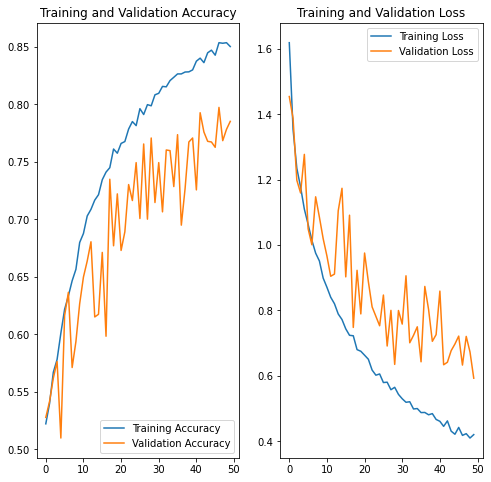

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 65ms/step


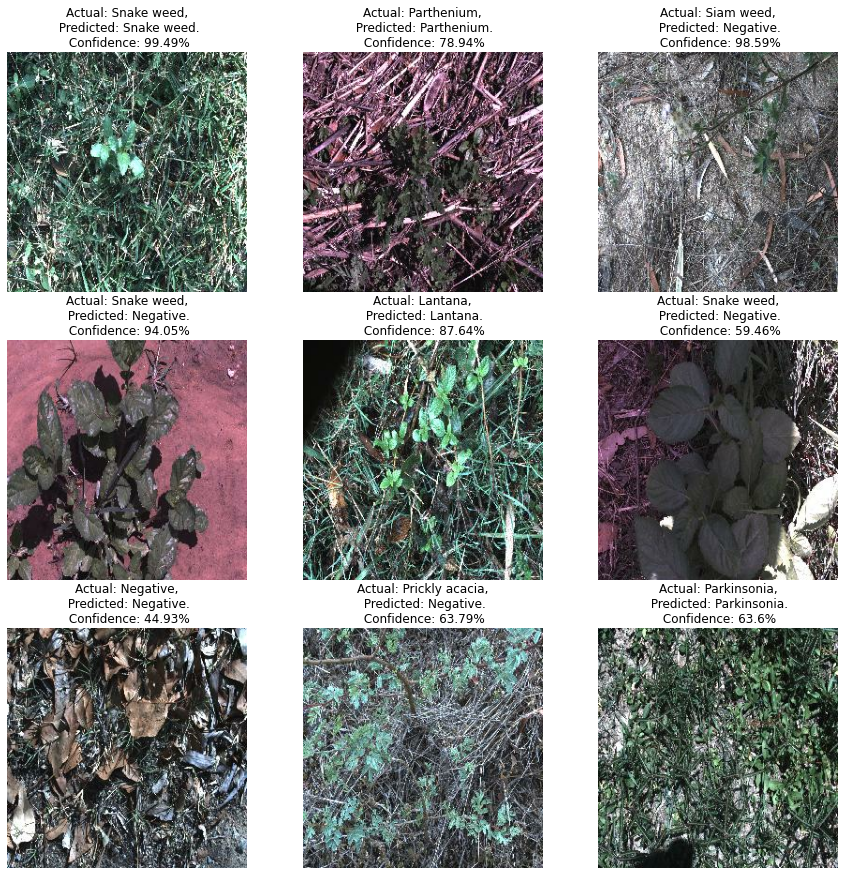

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [1]:
import tensorflow as tf

In [2]:
MODEL = tf.keras.models.load_model("../savedmodels/1")

In [17]:
import numpy as np
from sklearn.metrics import f1_score
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3


In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Dataset",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE)

Found 17509 files belonging to 9 classes.


In [7]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds
    

In [8]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [19]:
class_names=dataset.class_names

In [10]:
test_images = []
test_labels = []
for image_batch, label_batch in test_ds:
    for i in range(len(image_batch)):
        test_images.append(image_batch[i])
        test_labels.append(label_batch[i])

test_images = np.array(test_images)
test_labels_categorical = to_categorical(np.array(test_labels), num_classes=9)

In [11]:
y_pred = MODEL.predict(test_images)

56/56 [==============================] - 15s 210ms/step


In [12]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels_categorical, axis=1)

In [13]:
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')


In [14]:
print('F1 score:', f1)

F1 score: 0.8090119609779425


In [15]:
def predict(MODEL, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = MODEL.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 2s 2s/step


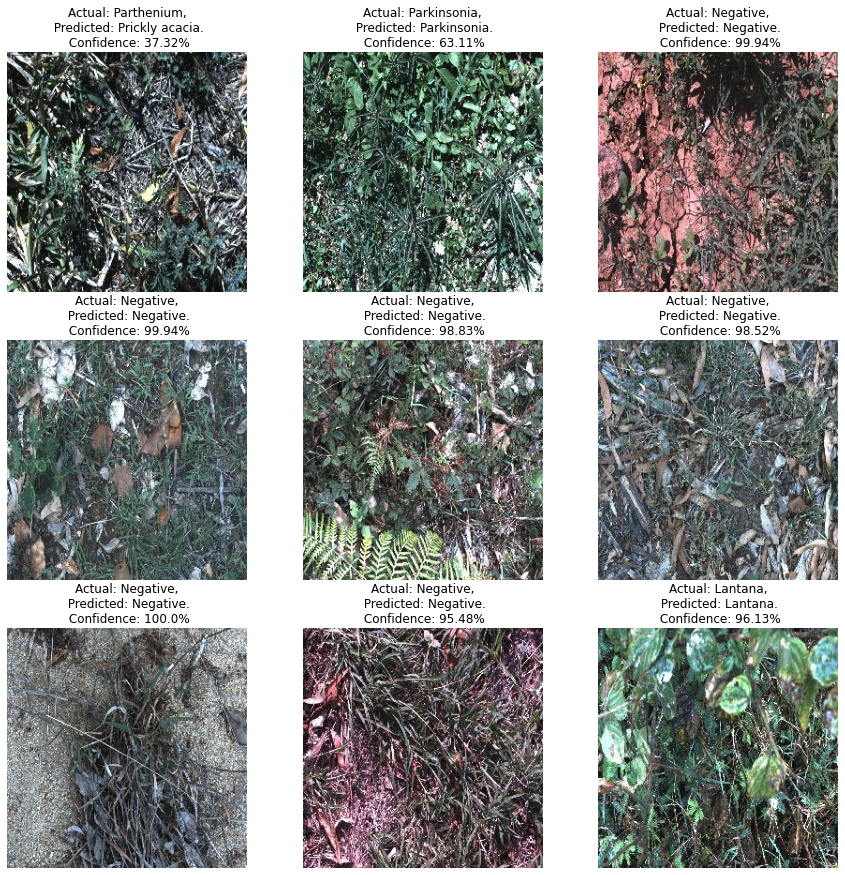

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(MODEL, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")